In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
classes = np.unique(train_labels)
nClasses = len(classes)
cifar_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [3]:
nrows,ncols,ndims = train_images.shape[1:]
input_shape = (nrows,ncols,ndims)
train_data = train_images.astype("float32")
test_data = test_images.astype("float32")
train_data /= 255
test_data /= 255
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)
print(train_labels_onehot.shape)

(50000, 10)


In [4]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding="same",activation="relu",input_shape=input_shape))
    model.add(Conv2D(32,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(Conv2D(64,(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses,activation="softmax"))
    return model

In [5]:
model1 = createModel()
batch_size=256
epochs=50
model1.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
model1.summary()
print(train_data.shape)
print(train_labels.shape)
history = model1.fit(train_data,train_labels_onehot,batch_size=batch_size,
                     epochs=epochs,verbose=1,
                     validation_data=(test_data,test_labels_onehot))
model1.evaluate(test_data,test_labels_onehot)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

[0.6532283869743347, 0.796500027179718]

In [1]:
plt.figure(figsize=[8,6])
plt.plot(history.history["loss"],"r")
plt.plot(history.history["val_loss"],"b")
plt.legend(["train_loss","validation_loss"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.title("Loss Curves",fontsize=14)

plt.figure(figsize=[8,6])
plt.plot(history.history["acc"],"r")
plt.plot(history.history["val_acc"],"b")
plt.legend(["train_acc","validation_acc"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.title("Accuracy Curves",fontsize=14)
plt.show()

NameError: name 'plt' is not defined

In [10]:
from keras.preprocessing.image import ImageDataGenerator
model2 = createModel()
model2.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
batch_size = 256
epochs = 10
datagen = ImageDataGenerator(
            zoom_range=0.2,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

In [12]:
history2 = model2.fit_generator(datagen.flow(train_data,train_labels_onehot,batch_size=batch_size),
                               steps_per_epoch=int(np.ceil(train_data.shape[0]/float(batch_size))),
                               epochs=epochs,
                               validation_data=(test_data,test_labels_onehot),
                               workers=4)
model2.evaluate(test_data,test_labels_onehot)
#model2.save("model.h5")

Epoch 1/10
196/196 [==============================] - 27s 138ms/step - loss: 2.0702 - acc: 0.2347 - val_loss: 2.0494 - val_acc: 0.2565
Epoch 2/10
196/196 [==============================] - 25s 127ms/step - loss: 1.7820 - acc: 0.3527 - val_loss: 1.4924 - val_acc: 0.4649
Epoch 3/10
196/196 [==============================] - 24s 123ms/step - loss: 1.6250 - acc: 0.4105 - val_loss: 1.5980 - val_acc: 0.4299
Epoch 4/10
196/196 [==============================] - 24s 125ms/step - loss: 1.5107 - acc: 0.4558 - val_loss: 1.3262 - val_acc: 0.5225
Epoch 5/10
196/196 [==============================] - 24s 125ms/step - loss: 1.4297 - acc: 0.4874 - val_loss: 1.2165 - val_acc: 0.5679
Epoch 6/10
196/196 [==============================] - 24s 122ms/step - loss: 1.3536 - acc: 0.5172 - val_loss: 1.1119 - val_acc: 0.6052
Epoch 7/10
196/196 [==============================] - 25s 126ms/step - loss: 1.2921 - acc: 0.5413 - val_loss: 1.0641 - val_acc: 0.6228
Epoch 8/10
196/196 [==============================] - 2

[0.9438646984100342, 0.6680999994277954]

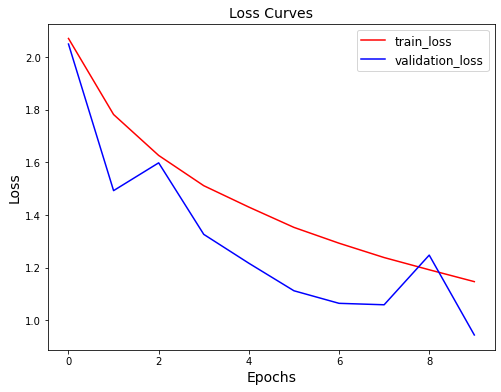

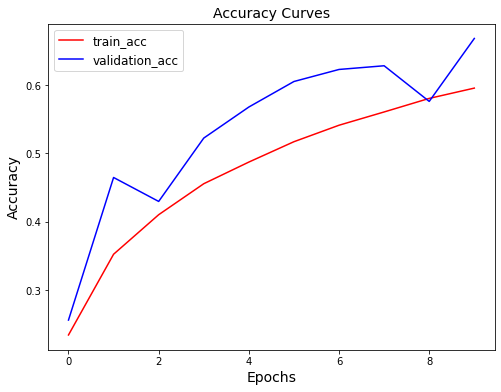

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history2.history["loss"],"r")
plt.plot(history2.history["val_loss"],"b")
plt.legend(["train_loss","validation_loss"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Loss",fontsize=14)
plt.title("Loss Curves",fontsize=14)

plt.figure(figsize=[8,6])
plt.plot(history2.history["acc"],"r")
plt.plot(history2.history["val_acc"],"b")
plt.legend(["train_acc","validation_acc"],fontsize=12)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Accuracy",fontsize=14)
plt.title("Accuracy Curves",fontsize=14)
plt.show()